# Introduction to neural network cklassification with TensorFlow


In this notebook we're going to learn how to write neural network for classification problems

 A classification is where you try to classify something as one thing or another

A few types of classification problems:
1. binarry classification
2. multiclass classification
3. multilabel classification

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#Create circle
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42
                  )

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)


# Our data is little hard to understand right now... let's visualize it

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


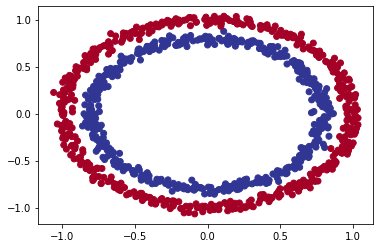

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Input and output shapes

In [8]:
# Check the shape of our feature and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of fetaure and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [13]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.5.0'

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
               )

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [15]:
# Let's try and improve our model by training for longer ...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 884us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on binary classifcation problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer .

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
               )
# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 901us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [20]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving the model

Let's look into our bag of tricks to see how we can improve our model
1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we moght fit our model for more epochs (leave training it for longer)

In [21]:
# Set randor seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )
# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [22]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

In [23]:
# Check prediction
model_3.predict(X)

array([[0.48793244],
       [0.558876  ],
       [0.56292844],
       [0.5705067 ],
       [0.44141144],
       [0.57388216],
       [0.5576486 ],
       [0.48246646],
       [0.4775583 ],
       [0.57502264],
       [0.514849  ],
       [0.530877  ],
       [0.56437737],
       [0.45787305],
       [0.45052725],
       [0.461299  ],
       [0.5405582 ],
       [0.4638092 ],
       [0.5479803 ],
       [0.50375676],
       [0.5063044 ],
       [0.58775455],
       [0.4590246 ],
       [0.49123323],
       [0.583216  ],
       [0.5704256 ],
       [0.55239356],
       [0.4631735 ],
       [0.45773405],
       [0.45440978],
       [0.47872233],
       [0.57856053],
       [0.5554615 ],
       [0.46339148],
       [0.45849162],
       [0.58986676],
       [0.5724737 ],
       [0.52974397],
       [0.45870548],
       [0.51092887],
       [0.49994153],
       [0.5463086 ],
       [0.51099026],
       [0.4579724 ],
       [0.5223273 ],
       [0.53888035],
       [0.44872284],
       [0.544

To visualize our models prediction, let's create a function 'plot_decission_boundary()', this funstion will:
1. Take in trained model, fetaure (X) and model (y)
2. Create a meshgrid of the different X values
3. Make prediction across meshgrid
4. Plot the predictions as well as a line between zones (where each unique class falls)

In [28]:
import numpy as np

def plot_decission_boundary(model, X, y):
    """
    Plots the decission boundary create by model predicting on X.
    This function isnpired by resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    """
    # Define the axis of the plot and create the meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on theese)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binnary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the dexission boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binnary classification


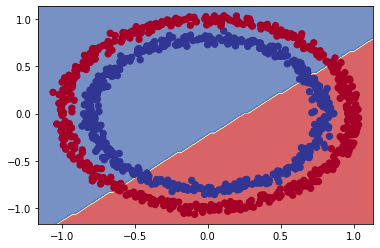

In [29]:
# Check out the prediction our model is making
plot_decission_boundary(model=model_3,
                        X=X,
                        y=y
                       )

In [25]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [31]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# 1. Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X+100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model into regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


Oh wait.. we compiled our model for binnary classification problem.
But, we're working on regression problem, let's change the model suit our data

In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]
               )

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 2ms/step - loss: 38.8399 - mae: 38.8399
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 38.5599 - mae: 38.5599
Epoch 97/100
5/5 [==============================] - 0s 2ms/step

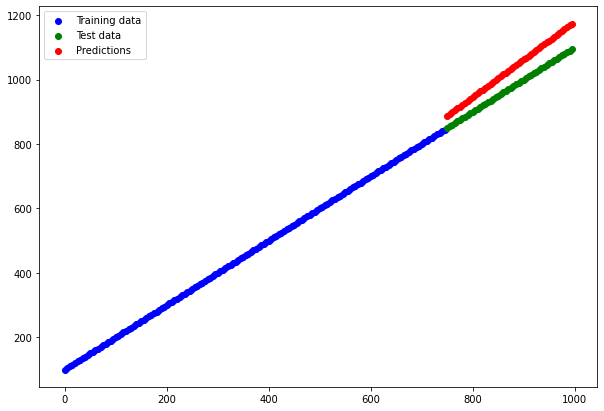

In [34]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models prediction against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non-linearity

In [36]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
               )

# 3. Fit the model
model_4.fit(X, y, epochs=100)

C:\Users\Test-Laptop-2\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
32/32 [==============================] - 2s 9ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - ETA: 0s - loss: 3.4112 - accuracy: 0.43 - 0s 3ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step -

32/32 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.4830
Epoch 83/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7204 - accuracy: 0.4840
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7193 - accuracy: 0.4840
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.4860
Epoch 86/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.4880
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.4880
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.4880
Epoch 89/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4880
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.4880
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7128 - accuracy: 0.4910
Epoch 92/100


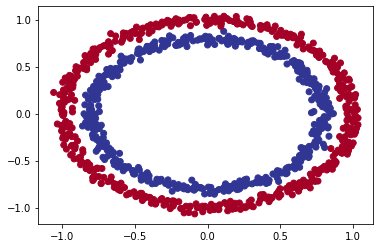

In [38]:
# Check our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

doing binnary classification


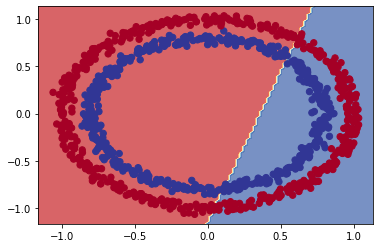

In [39]:
# Check the decission boundary for our latest model
plot_decission_boundary(model=model_4,
                        X=X,
                        y=y
                       )